# Excelデータから作図

九州各県の人口推移をまとめたexcelから、作図

In [1]:
import pandas
import matplotlib.pyplot as plt
import japanize_matplotlib

各県の曲線の色を指定

In [2]:
colors={
    '福岡':'darkred',
    '佐賀':'green',
    '長崎':'blue',
    '大分':'purple',
    '熊本':'orangered',
    '宮崎':'red',
    '鹿児島':'darkblue',
    '九州全体': 'gray'
}

各県の人口推移をプロットする関数

In [3]:
def drawTimeSequence(df :pandas.DataFrame): #dataFrameを受け取る
    for pref in df.index: #各行にある県名を取得
        ser = df.loc[pref] #一行のデータ（時系列）を取得
        #一行のデータをプロットし、ラベルとして県名を設定
        ser.plot(label = pref, color = colors[pref])

九州の人口の総和を求めて、dataFrameに追記する

In [4]:
def totalPopulation(df: pandas.DataFrame):
    total = df.sum(axis = 'index')
    df.loc['九州全体'] = total

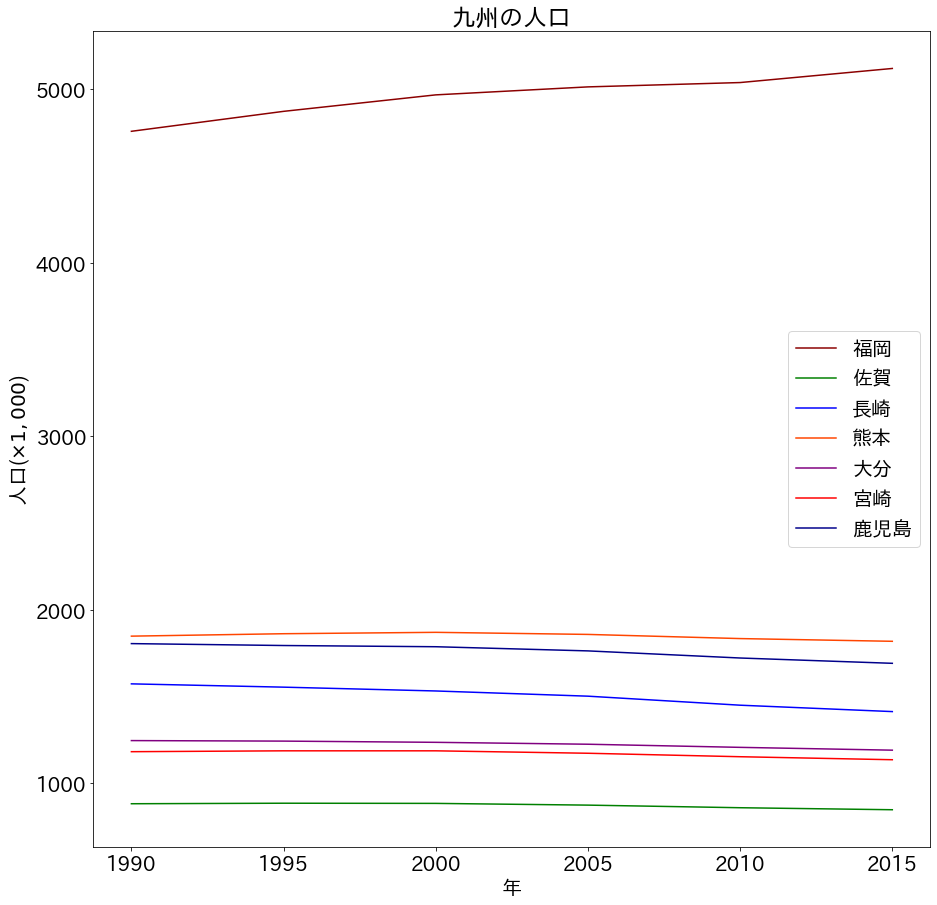

In [5]:
filename = 'KyushuPopulation.xlsx'
with pandas.ExcelFile(filename) as f:
    df = pandas.read_excel(f)
df.set_index('県', inplace = True) #左端のカラムにインデクスを設定
#totalPopulation(df)   
#図の準備
plt.figure(figsize = (15, 15), facecolor = 'white')
plt.rcParams['font.size'] = 20
plt.title('九州の人口')
plt.xlabel('年')
plt.ylabel('人口($\\times1,000$)')
#各県のデータをプロット
drawTimeSequence(df)

plt.legend()
plt.show()